<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [1]:
import pprint
import itertools
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [2]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv


for details.

--2020-11-23 01:03:19--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 
  HTTP/1.1 200 OK
  Date: Mon, 23 Nov 2020 00:03:20 GMT
  X-Clv-Request-Id: 6737f72b-6732-44a6-99e9-525c6b00600a
  Server: Cleversafe/3.15.2.34
  X-Clv-S3-Version: 2.5
  Accept-Ranges: bytes
  x-amz-request-id: 6737f72b-6732-44a6-99e9-525c6b00600a
  ETag: "f8b5a3325b44ab3696e6fb80d477fe13"
  Content-Type: text/csv
  Last-Modified: Fri, 08 Jun 2018 21:12:29 GMT
  Content-Length: 23101
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.1s    

2020-11-23 01:03:20 (225 KB/s) -

### Load Data From CSV File  

In [3]:
df = pd.read_csv('loan_train.csv')
print(df.shape)
df.head(9)


(346, 10)


,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
5,7,7,PAIDOFF,1000,30,9/9/2016,10/8/2016,36,college,male
6,8,8,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,male
7,9,9,PAIDOFF,800,15,9/10/2016,9/24/2016,26,college,male
8,10,10,PAIDOFF,300,7,9/10/2016,9/16/2016,29,college,male


In [4]:
# fix spelling error
df['education'] = df['education'].str.replace('Bechalor', 'Bachelor')


### Convert to date time object 

In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bachelor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [6]:
# inspect values
print("Possible values for each categorical key:")
for k in ['loan_status', 'education', 'Gender', 'effective_date', 'due_date']:
    vals = set(df[k])
    if type(next(iter(vals))) == pd.Timestamp:
        vals = [v.strftime('%x') for v in vals]
    print("{:13}\t {}".format(k, vals))


Possible values for each categorical key:
loan_status  	 {'PAIDOFF', 'COLLECTION'}
education    	 {'High School or Below', 'Bachelor', 'college', 'Master or Above'}
Gender       	 {'female', 'male'}
effective_date	 ['09/11/16', '09/09/16', '09/10/16', '09/13/16', '09/08/16', '09/14/16', '09/12/16']
due_date     	 ['10/08/16', '10/12/16', '11/10/16', '09/18/16', '09/24/16', '09/27/16', '10/25/16', '09/17/16', '09/16/16', '10/26/16', '09/19/16', '09/23/16', '11/12/16', '10/10/16', '10/13/16', '10/07/16', '09/26/16', '09/28/16', '10/09/16', '11/09/16', '09/22/16', '09/25/16', '10/11/16']


In [7]:
df.describe(percentiles=[.5], include='all', datetime_is_numeric=True)


,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
count,346.000000,346.000000,346,346.000000,346.000000,346,346,346.000000,346,346
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,4,2
top,NaN,NaN,PAIDOFF,NaN,NaN,NaN,NaN,NaN,High School or Below,male
freq,NaN,NaN,260,NaN,NaN,NaN,NaN,NaN,151,294
mean,202.167630,202.167630,NaN,943.641618,22.653179,2016-09-11 11:22:32.601156096,2016-10-04 20:02:46.473988352,30.939306,NaN,NaN
min,0.000000,0.000000,NaN,300.000000,7.000000,2016-09-08 00:00:00,2016-09-16 00:00:00,18.000000,NaN,NaN
50%,204.500000,204.500000,NaN,1000.000000,30.000000,2016-09-11 00:00:00,2016-10-09 00:00:00,30.000000,NaN,NaN
max,399.000000,399.000000,NaN,1000.000000,30.000000,2016-09-14 00:00:00,2016-11-12 00:00:00,51.000000,NaN,NaN
std,115.459715,115.459715,NaN,109.425530,7.991006,NaN,NaN,6.039418,NaN,NaN


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [8]:
df['loan_status'].value_counts()


PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Let's plot some columns to understand data better:

In [9]:
# notice: installing seaborn might takes a few minutes
# !conda install -c anaconda seaborn -y

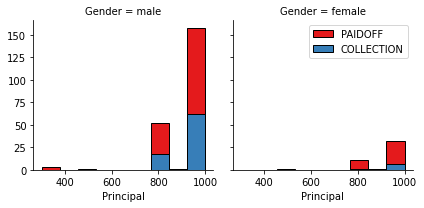

In [10]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

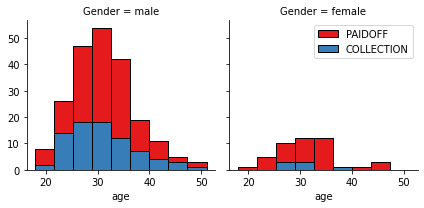

In [11]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

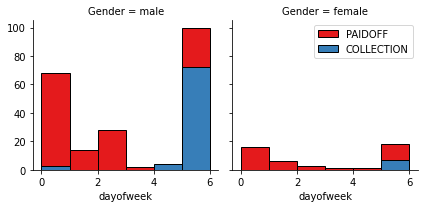

In [12]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 7)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [13]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bachelor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [14]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [15]:
df['Gender'].replace(to_replace=['male','female'], value=[0, 1], inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bachelor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding  
#### How about education?

In [16]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bachelor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature befor One Hot Encoding

In [17]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bachelor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [18]:
features = df[['Principal','terms','age','Gender','weekend']]
features = pd.concat([features, pd.get_dummies(df['education'])], axis=1)
features.drop(['Master or Above'], axis=1, inplace=True)
features.head()


,Principal,terms,age,Gender,weekend,Bachelor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature selection

Lets defind feature sets, X:

In [19]:
X = features
X[:5]

,Principal,terms,age,Gender,weekend,Bachelor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?

In [20]:
y = df['loan_status'].values
y[:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [21]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

In [22]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

# KNN works best with low number of dimensions
# select columns: Principal | terms | age | Gender | weekend
X5_train, X5_test, y5_train, y5_test = train_test_split(X[:, :5].copy(), y, test_size=0.2, random_state=42)

# In order to render the decision tree interpretable, non-standardized data is preferable
Xdt_train, Xdt_test, ydt_train, ydt_test = train_test_split(features.copy(), df['loan_status'].values.copy(), test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

In [23]:
from sklearn.neighbors import KNeighborsClassifier

# First test
k = 4
knn = KNeighborsClassifier(n_neighbors=k, algorithm='auto').fit(X5_train, y5_train)
y5_hat = knn.predict(X5_test)

# Verbosity
print(knn)
print("Train set accuracy:          {:6.4f}".format(
    metrics.accuracy_score(y5_train, knn.predict(X5_train))))
print("Test set accuracy:           {:6.4f}".format(
    metrics.accuracy_score(y5_test, y5_hat)))
print("Test set accuracy (Jaccard): {:6.4f}".format(
    metrics.jaccard_score(y5_test, y5_hat, average='micro')))
print("Test set accuracy (F1):      {:6.4f}".format(
    metrics.f1_score(y5_test, y5_hat, average='micro')))

KNeighborsClassifier(n_neighbors=4)
Train set accuracy:          0.7862
Test set accuracy:           0.5143
Test set accuracy (Jaccard): 0.3462
Test set accuracy (F1):      0.5143


It seems the documentation of the `metrics.*_score` functions is confusingly phrased.
`accuracy_score` actually calculates the normalized sum of true positives and true negatives, which is  in this case equal to the F1-score, and not the Jaccard index as stated in its [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score).

In [24]:
# Validate score functions by computing them manually
print("Validation of accuracy_score func: {:6.4f}".format(
    sum(y5_test == y5_hat) / len(y5_test)))
print("Validation of jaccard_score func:  {:6.4f}".format(
    sum(y5_test == y5_hat) / (2*len(y5_test) - sum(y5_test == y5_hat))))

Validation of accuracy_score func: 0.5143
Validation of jaccard_score func:  0.3462


K=01, K=03, K=05, K=07, K=09, K=11, K=13, K=15, K=17, K=19, K=21, K=23, K=25, K=27, K=29, K=31, K=33, K=35, K=37, K=39, K=41, K=43, K=45, K=47, K=49
Optimal K=27 w/ acc 0.7613


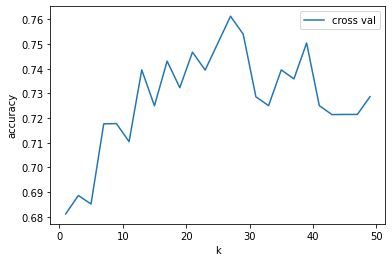

In [25]:
klim = 51  # int(np.sqrt(X_train.shape[0]))
kvals = range(1, klim, 2)
acc_k = [0 for k in range(klim)]

# Determine optimal parameter choice for k
for k in kvals:
    knn = KNeighborsClassifier(n_neighbors=k)
    fold_scores = cross_val_score(knn, X5_train, y5_train, cv=5)
    acc_k[k] = np.mean(fold_scores)
    # some verbosity
    endstr = ", "
    if k ==  kvals[-1]:
        endstr = ""
    print("K={:02d}".format(k), end=endstr)

optimal_k = np.argmax(acc_k)
print("\nOptimal K={} w/ acc {:6.4f}".format(optimal_k, np.max(acc_k)))
    
# Plotting
plt.plot(kvals, acc_k[1::2], color='tab:blue', label='cross val')
plt.legend()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()

In [26]:
# With optimal k
k = optimal_k
knn = KNeighborsClassifier(n_neighbors=k, algorithm='auto').fit(X5_train, y5_train)
y5_hat = knn.predict(X5_test)

# Verbosity
print(knn)
print("Train set accuracy:          {:6.4f}".format(
    metrics.accuracy_score(y5_train, knn.predict(X5_train))))
print("Test set accuracy:           {:6.4f}".format(
    metrics.accuracy_score(y5_test, y5_hat)))
print("Test set accuracy (Jaccard): {:6.4f}".format(
    metrics.jaccard_score(y5_test, y5_hat, average='micro')))
print("Test set accuracy (F1):      {:6.4f}".format(
    metrics.f1_score(y5_test, y5_hat, average='micro')))

KNeighborsClassifier(n_neighbors=27)
Train set accuracy:          0.7645
Test set accuracy:           0.7429
Test set accuracy (Jaccard): 0.5909
Test set accuracy (F1):      0.7429


For the nearest neighbor analysis, only a subset of all attributes (Principal, terms, age, Gender) was used to build the model, due to the fact that KNN achieves best results, when the number of dimensions is kept low.
A 5-fold cross correlation determines the optimal number of neighbors to be 27.
KNN with `k=27` achieves an accuracy of 0.74, meaning roughly 3 out of 4 cases can be accurately predicted.

In order to verify that our model which uses only 5 dimensions actually performs better, we will repeat the same analysis on the entire training dataset.

K=01, K=03, K=05, K=07, K=09, K=11, K=13, K=15, K=17, K=19, K=21, K=23, K=25, K=27, K=29, K=31, K=33, K=35, K=37, K=39, K=41, K=43, K=45, K=47, K=49
Optimal K=23 w/ acc 0.7575


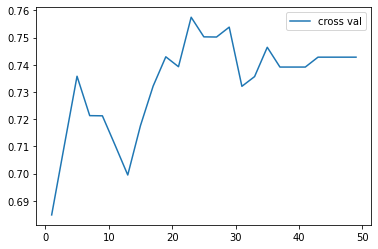

In [27]:
klim = 51  # int(np.sqrt(X_train.shape[0]))
kvals = range(1, klim, 2)
acc_k = [0 for k in range(klim)]

# Determine optimal parameter choice for k
for k in kvals:
    knn_full = KNeighborsClassifier(n_neighbors=k)
    fold_scores = cross_val_score(knn_full, X_train, y_train, cv=5)
    acc_k[k] = np.mean(fold_scores)
    # some verbosity
    endstr = ", "
    if k ==  kvals[-1]:
        endstr = ""
    print("K={:02d}".format(k), end=endstr)

optimal_k_full = np.argmax(acc_k)
print("\nOptimal K={} w/ acc {:6.4f}".format(optimal_k_full, np.max(acc_k)))

# Plotting
plt.plot(kvals, acc_k[1::2], color='tab:blue', label='cross val')
plt.legend()
plt.show()

In [28]:
# With optimal k
k_full = optimal_k_full
knn_full = KNeighborsClassifier(n_neighbors=k_full, algorithm='auto').fit(X_train, y_train)
y_hat = knn_full.predict(X_test)

# Verbosity
print(knn_full)
print("Train set accuracy:          {:6.4f}".format(
    metrics.accuracy_score(y_train, knn_full.predict(X_train))))
print("Test set accuracy:           {:6.4f}".format(
    metrics.accuracy_score(y_test, y_hat)))
print("Test set accuracy (Jaccard): {:6.4f}".format(
    metrics.jaccard_score(y_test, y_hat, average='micro')))
print("Test set accuracy (F1):      {:6.4f}".format(
    metrics.f1_score(y_test, y_hat, average='micro')))

KNeighborsClassifier(n_neighbors=23)
Train set accuracy:          0.7464
Test set accuracy:           0.6857
Test set accuracy (Jaccard): 0.5217
Test set accuracy (F1):      0.6857


So, the accuracy of the model based on the entire training dataset is indeed slightly worse with accuracy of 0.69 compared to 0.74 from the dataset using less dimensions.

# Decision Tree

In [29]:
from sklearn import tree

# Determine optimal parameter choice for `max_depth`
optimal_depth = 0
optimal_acc = 0
for i in range(3, 10):
    dtree = tree.DecisionTreeClassifier(criterion="entropy", max_depth=i, min_samples_leaf=1)
    fold_scores = cross_val_score(dtree, X_train, y_train, cv=5)
    acc = np.mean(fold_scores)
    if acc > optimal_acc:
        optimal_acc = acc
        optimal_depth = i
    print("Acc: {:6.4f} @ max_depth={}".format(acc, i))
print("Optimal max_depth={}".format(optimal_depth))

Acc: 0.7105 @ max_depth=3
Acc: 0.7251 @ max_depth=4
Acc: 0.7139 @ max_depth=5
Acc: 0.7321 @ max_depth=6
Acc: 0.6995 @ max_depth=7
Acc: 0.7140 @ max_depth=8
Acc: 0.7140 @ max_depth=9
Optimal max_depth=6


In [30]:
# With optimal max_depth
dtree = tree.DecisionTreeClassifier(criterion="entropy", max_depth=optimal_depth, min_samples_leaf=1)
dtree = dtree.fit(Xdt_train, ydt_train)
ydt_hat = dtree.predict(Xdt_test)

# Verbosity
print("Train set accuracy:          {:6.4f}".format(
    metrics.accuracy_score(ydt_train, dtree.predict(Xdt_train))))
print("Test set accuracy:           {:6.4f}".format(
    metrics.accuracy_score(ydt_test, ydt_hat)))
print("Test set accuracy (Jaccard): {:6.4f}".format(
    metrics.jaccard_score(ydt_test, ydt_hat, average='micro')))
print("Test set accuracy (F1):      {:6.4f}".format(
    metrics.f1_score(ydt_test, ydt_hat, average='micro')))

Train set accuracy:          0.8007
Test set accuracy:           0.6429
Test set accuracy (Jaccard): 0.4737
Test set accuracy (F1):      0.6429


Notice: You might need to install the pydotplus and graphviz libraries if you have not installed these before
```
sudo apt install graphviz
pip install pydotplus
pip install graphviz
```

Or simply use the virtualenv as described by the Pipfile in the repository.
To install and activate it, type
```
pipenv install
pipenv run jupyter-lab
```

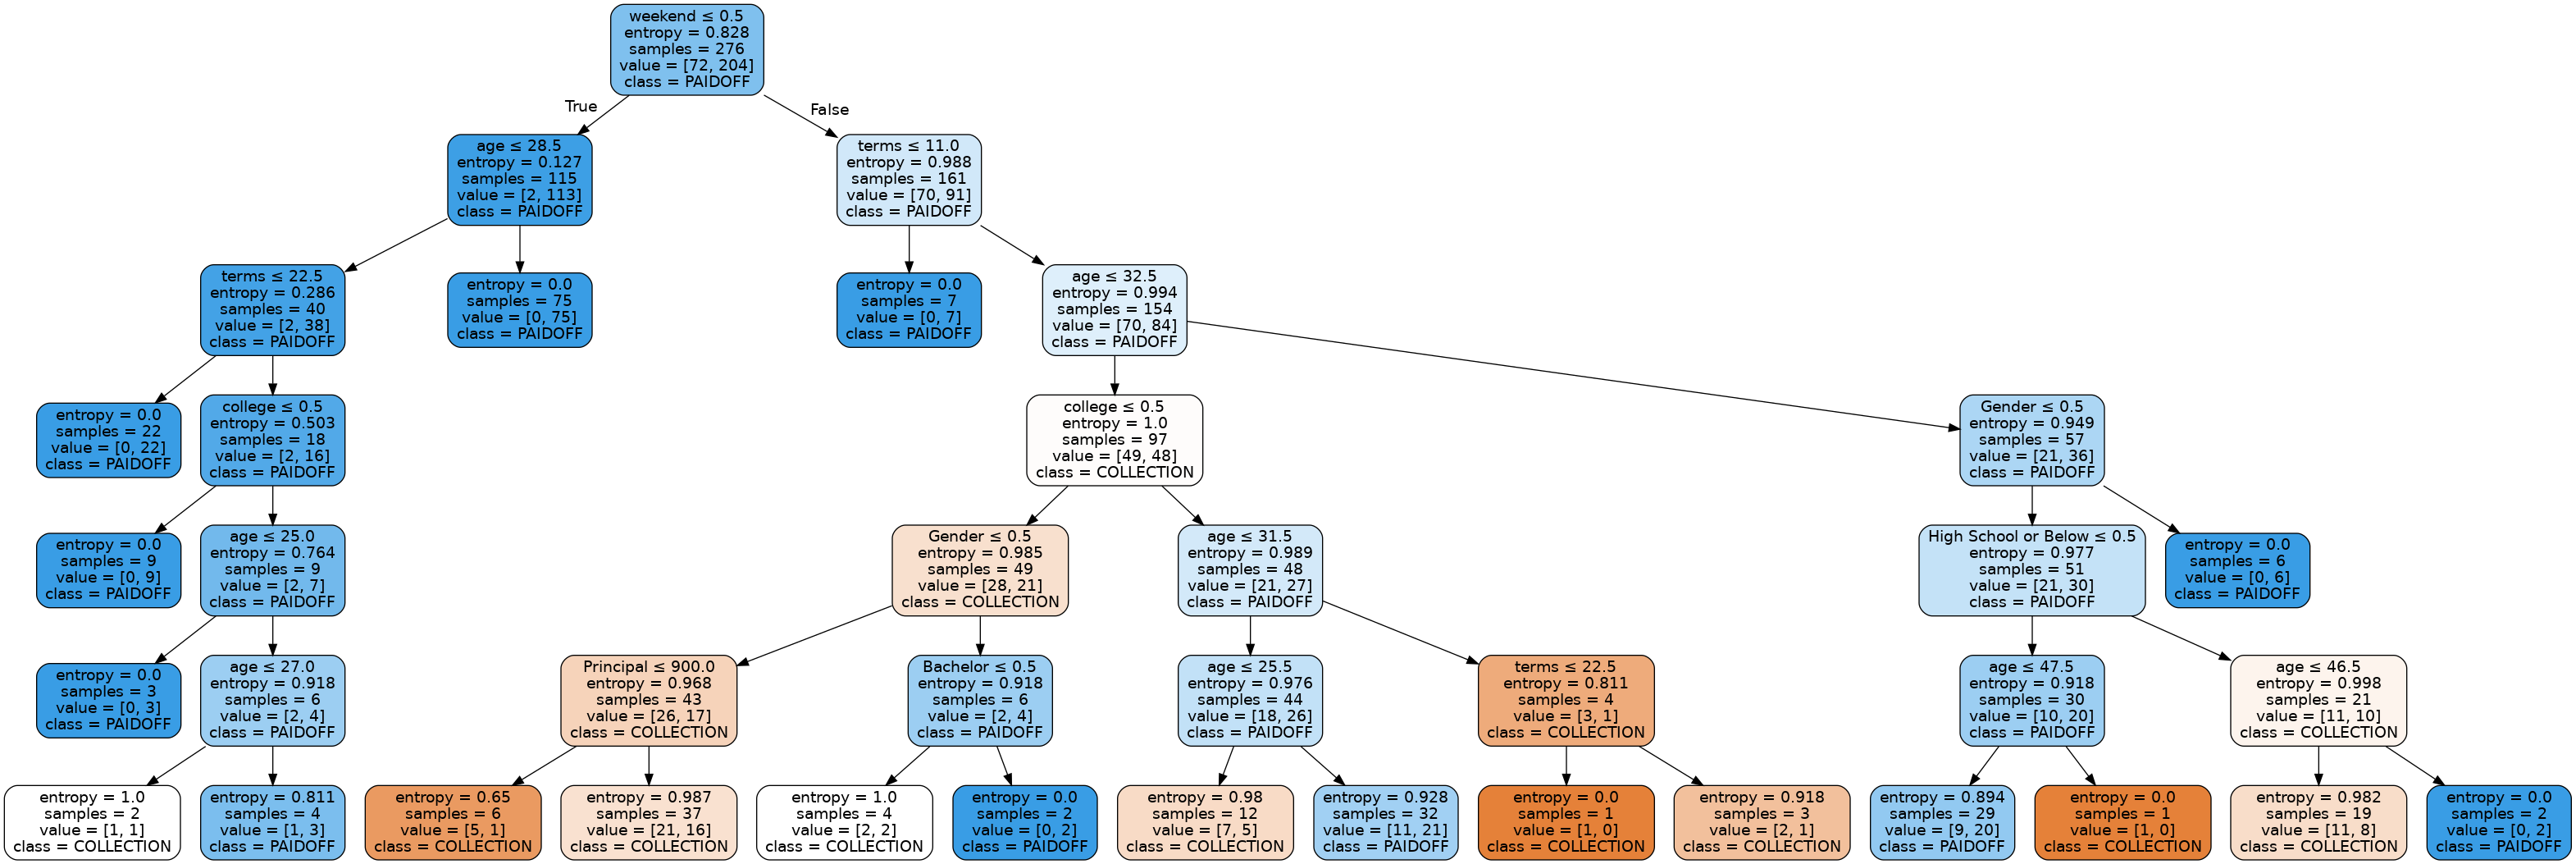

In [31]:
import pydotplus
from pydotplus import graphviz
import matplotlib.image as mpimg
import base64
import io
from IPython.display import Image as JImg

filename = "loan_dtree.png"
featureNames = features.columns
targetNames = df['loan_status'].unique().tolist()
dot_dta = tree.export_graphviz(dtree, feature_names=featureNames,
                               class_names=np.unique(ydt_train),
                               rounded=True, filled=True, special_characters=True, rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_dta)

jimg = JImg(graph.create_png())
# with open(filename, 'wb') as f:
#     f.write(jimg.data)
jimg

The decision tree model derived from the training split yields an accuracy of 0.64. The `max_depth` parameter was tuned for best performance (choosing a high value might cause overfitting).
It seems the KNN model makes better predictions than a decision tree model in comparison.

# Support Vector Machine

In [32]:
from sklearn import svm

# Determine optimal parameters for SVM
optimal_kernel = ''
optimal_degree = 0
optimal_acc = 0
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for k in kernels:
    deg = 3  # default
    if k == 'poly':
        for deg in range(2, 8):
            svm_mdl = svm.SVC(kernel=k, gamma='auto', degree=deg)
            fold_scores = cross_val_score(svm_mdl, X_train, y_train, cv=5)
            acc = np.mean(fold_scores)
            print("Acc: {:6.4f} with kernel: {}(degree={})".format(acc, k, deg))
    else:
        svm_mdl = svm.SVC(kernel=k, gamma='auto')
        fold_scores = cross_val_score(svm_mdl, X_train, y_train, cv=5)
        acc = np.mean(fold_scores)
        print("Acc: {:6.4f} with kernel: {}".format(acc, k))
    if acc > optimal_acc:
        optimal_kernel = k
        optimal_degree = deg
        optimal_acc = acc
print("Optimal kernel: {} (degree={})".format(optimal_kernel, optimal_degree))

Acc: 0.7502 with kernel: linear
Acc: 0.7247 with kernel: poly(degree=2)
Acc: 0.7247 with kernel: poly(degree=3)
Acc: 0.7210 with kernel: poly(degree=4)
Acc: 0.7138 with kernel: poly(degree=5)
Acc: 0.7138 with kernel: poly(degree=6)
Acc: 0.7247 with kernel: poly(degree=7)
Acc: 0.7431 with kernel: rbf
Acc: 0.7357 with kernel: sigmoid
Optimal kernel: linear (degree=3)


In [33]:
# With optimal kernel
svm_mdl = svm.SVC(kernel=optimal_kernel, gamma='auto', degree=optimal_degree).fit(X_train, y_train)
y_hat = svm_mdl.predict(X_test)

# Verbosity
print("Train set accuracy:          {:6.4f}".format(
    metrics.accuracy_score(y_train, svm_mdl.predict(X_train))))
print("Test set accuracy:           {:6.4f}".format(
    metrics.accuracy_score(y_test, y_hat)))
print("Test set accuracy (Jaccard): {:6.4f}".format(
    metrics.jaccard_score(y_test, y_hat, average='micro')))
print("Test set accuracy (F1):      {:6.4f}".format(
    metrics.f1_score(y_test, y_hat, average='micro')))

Train set accuracy:          0.7645
Test set accuracy:           0.6714
Test set accuracy (Jaccard): 0.5054
Test set accuracy (F1):      0.6714


It seems that the SVM using a linear kernel function produces a tuned classification model for the test split dataset with an accuracy of 0.67, which is better than the decision tree model, but worse than the KNN model.

# Logistic Regression

# Model Evaluation using Test set

In [34]:
from sklearn.metrics import jaccard_score # jaccard_similarity_score is deprecated
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:

In [35]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

for details.

--2020-11-23 01:03:23--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 
  HTTP/1.1 200 OK
  Date: Mon, 23 Nov 2020 00:03:23 GMT
  X-Clv-Request-Id: 535a4271-91e5-4258-81ea-23d71607843d
  Server: Cleversafe/3.15.2.34
  X-Clv-S3-Version: 2.5
  Accept-Ranges: bytes
  x-amz-request-id: 535a4271-91e5-4258-81ea-23d71607843d
  ETag: "2ae94924bb8bb089c1596951282241a0"
  Content-Type: text/csv
  Last-Modified: Fri, 08 Jun 2018 21:12:29 GMT
  Content-Length: 3642
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2020-11-23 01:03:23 (1006 MB/s) - ‘

### Load Test set for evaluation 

In [36]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


### Preprocessing test dataset

# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>